In [1]:
import numpy as np
import matplotlib.pyplot as plt
from moirepy import BilayerMoireLattice, HexagonalLayer

twist angle = 0.1646 rad (9.4300 deg)
74 cells in upper lattice
74 cells in lower lattice


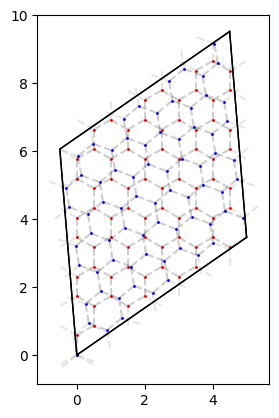

In [2]:
# Define a commensurate TBG lattice
lattice = BilayerMoireLattice(
    latticetype=HexagonalLayer,
    # Indices for a ~9.43 degree twist
    # Find these via our tool: https://jabed-umar.github.io/MoirePy/theory/avc/
    ll1=3, ll2=4, ul1=4, ul2=3, 
    n1=1, n2=1,    # Number of moiré unit cells
    pbc=True,      # Periodic Boundary Conditions, set False for OBC
    verbose=True   # Displays twist angle and atom counts
)

# Visualize the atomistic structure
lattice.plot_lattice()
# plt.savefig("1.png", dpi=300, bbox_inches='tight')  # Save the figure with high resolution
plt.savefig("1.webp", format='webp', dpi=300, bbox_inches='tight', pil_kwargs={'lossless': True})

In [3]:
# Returns a scipy.sparse.csc_matrix
ham = lattice.generate_hamiltonian(
    tll=1.0,      # Lower-layer intra-layer hopping
    tuu=1.0,      # Upper-layer intra-layer hopping
    tul=0.1,      # Inter-layer hopping (Upper -> Lower)
    tlu=0.1,      # Inter-layer hopping (Lower -> Upper)
    tlself=0.0,   # Lower-layer onsite potential
    tuself=0.0,   # Upper-layer onsite potential
    inter_layer_radius=3 # Cut-off circle for interlayer search
)

print(f"Hamiltonian Dimension: {ham.shape}")

Hamiltonian Dimension: (148, 148)


In [4]:
# k-point at the Gamma point (0, 0)
kham = lattice.generate_k_space_hamiltonian(
    k=np.array([0, 0]),
    tll=1.0, tuu=1.0, 
    tul=0.1, tlu=0.1, 
    tlself=0.0, tuself=0.0
)

In [7]:
print(f"PBC Non-zero entries: {ham.nnz}")

PBC Non-zero entries: 9728


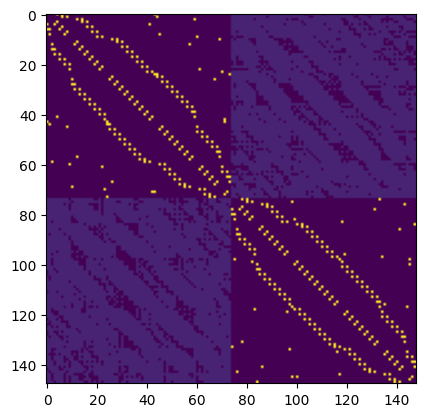

In [12]:
ham.todense().sum()
plt.imshow(ham.todense())

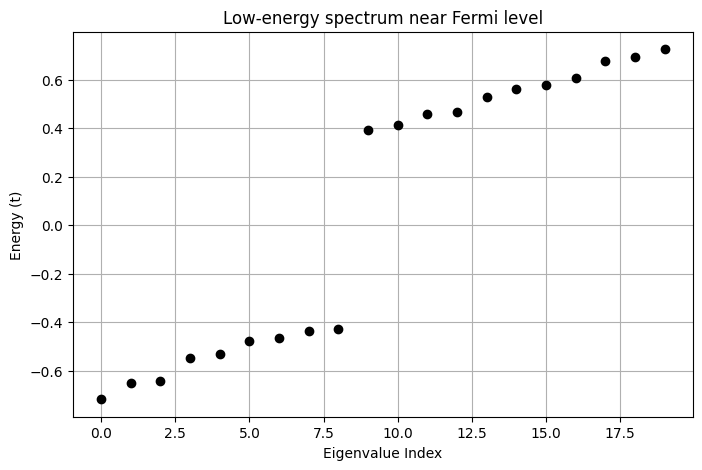

In [6]:
import matplotlib.ticker as ticker
from scipy.sparse.linalg import eigsh

eigenvalues = eigsh(ham, k=20, which='LM', sigma=0, return_eigenvectors=False)
sorted_ev = np.sort(eigenvalues)

fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(range(len(sorted_ev)), sorted_ev, color='black', zorder=3)
ax.grid(True)

ax.set_xlabel("Eigenvalue Index")
ax.set_ylabel("Energy (t)")
ax.set_title("Low-energy spectrum near Fermi level")

plt.savefig("2.webp", format='webp', dpi=300, bbox_inches='tight', pil_kwargs={'lossless': True})
# plt.savefig("2.png", dpi=300, bbox_inches='tight')